## Project :  Data Analysis of Global Movies  on Netflix Platform

## Attributes Information:
                                                        

###### show_id    :   A unique ID assigned to each Netflix show or movie                        
###### type       :   Whether the content is a **Movie** or a **TV Show**                       
###### title          The title/name of the show or movie                                       
###### director    :   Name(s) of the director(s)                                                
###### cast        :   Name(s) of the actors/actresses in the show or movie                      
###### country     :   Country or countries where the content was produced                       
###### date_added   :  Date when the content was added to Netflix                               
###### release_year  : The year the content was originally released                              
###### rating       :  Age rating (e.g., PG, TV-MA, R) indicating viewer suitability             
###### duration     :  Duration of the movie (in minutes) or number of seasons (for TV Shows)    
###### listed_in    :  Categories or genres the content belongs to (e.g., Drama, Comedy)         
###### description  :  A brief summary or synopsis of the content                                
###### day_added    :  The day of the month when the content was added                           
###### year_added   :  The year when the content was added to Netflix                            
###### month_added  :  The month when the content was added to Netflix                           
###### duration_num :  Numeric value of duration (minutes or seasons only)                       
###### duration_type : Unit of duration: either `"min"` for movies or `"Season(s)"` for TV shows 


### Importing  python Libraries

In [104]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Data Collection

### Importing dataset

In [7]:
#Importing dataset 
path="C:\\Users\\guder\\Downloads\\netflix_titles.csv"
DF=pd.read_csv(path)
DF

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


### First 10 records

In [9]:

DF.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


### Shape of dataset

In [11]:
DF.shape

(8807, 12)

In [12]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### Statistical summary of Dataset

In [14]:
DF.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


### columns in dataset

In [15]:
DF.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

# Data Cleaning

In [22]:
#checking sum of  null values in each attribute
DF.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

#### Removing duplicates

In [23]:
DF.drop_duplicates(inplace=True)

In [41]:
col=DF.columns
col

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [53]:
#count values
for i in col:
    print(f"{i}  : {DF[i].value_counts().sum()}")

show_id  : 8807
type  : 8807
title  : 8807
director  : 6173
cast  : 7982
country  : 7976
date_added  : 8797
release_year  : 8807
rating  : 8803
duration  : 8804
listed_in  : 8807
description  : 8807


In [58]:
print(DF.duplicated().sum())

0


###### From above we can conclude that there are no duplicate records in 

#### checking NULL values

In [54]:
DF.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [62]:
# copy dataset 
netflix=DF.copy()
netflix.shape

(8807, 12)

#### Replacing NULL values

In [69]:
# Instead of Removing null values  fill those values
DF['country'].fillna("Unknown", inplace=True)
DF['cast'].fillna("Not Available", inplace=True)
DF['director'].fillna("Not Available", inplace=True)
DF['date_added'].fillna(DF['date_added'].mode()[0], inplace=True)
DF['rating'].fillna('Not Rated', inplace=True)
DF['duration'].fillna('Unknown', inplace=True)

C:\Users\guder\AppData\Local\Temp\ipykernel_14448\318164559.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  DF['duration'].fillna('Unknown', inplace=True)


In [70]:
DF.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [76]:
DF['date_added'] = DF['date_added'].str.strip()  # removes leading/trailing spaces
DF['date_added'] = pd.to_datetime(DF['date_added'], errors='coerce')


#### Convering datatype and adding new attributes

In [78]:
DF["date_added"] = pd.to_datetime(DF['date_added'])
DF['day_added'] = DF['date_added'].dt.day
DF['year_added'] = DF['date_added'].dt.year
DF['month_added']=DF['date_added'].dt.month
DF['year_added'].astype(int);
DF['day_added'].astype(int);
DF.head(5)
# New Attributes like day,year and month  are added and date_added datatype changed as datetime
#Year_added,day_added data type changed

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Available,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",25,2021,9
1,s2,TV Show,Blood & Water,Not Available,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,2021,9
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24,2021,9
3,s4,TV Show,Jailbirds New Orleans,Not Available,Not Available,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",24,2021,9
4,s5,TV Show,Kota Factory,Not Available,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,24,2021,9


### Feature Engineering

In [101]:
DF['duration_num'] = DF['duration'].str.extract('(\d+)').astype(float)
DF['duration_type'] = DF['duration'].str.extract('([a-zA-Z]+)')
DF.dtypes
# From duration attribute both duration num EX:90 and Duration Type EX: min,season

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\guder\AppData\Local\Temp\ipykernel_14448\3719374769.py:1: SyntaxWarning: invalid escape sequence '\d'
  DF['duration_num'] = DF['duration'].str.extract('(\d+)').astype(float)


show_id                  object
type                     object
title                    object
director                 object
cast                     object
country                  object
date_added       datetime64[ns]
release_year              int64
rating                   object
duration                 object
listed_in                object
description              object
day_added                 int32
year_added                int32
month_added               int32
duration_num            float64
duration_type            object
dtype: object

<Axes: >

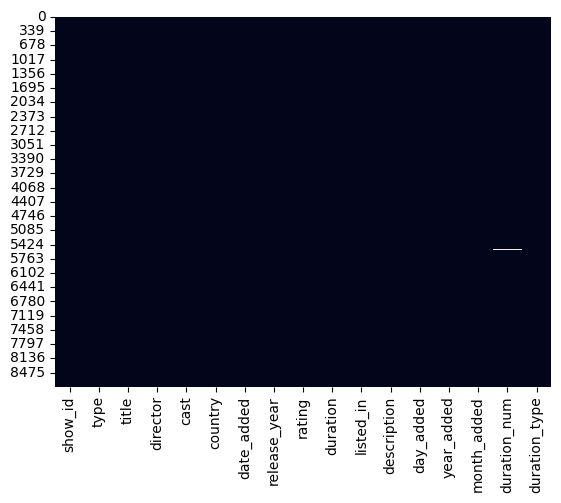

In [106]:
sns.heatmap(DF.isnull(), cbar=False)

#### From above heatmap we can say thaht some null values in duration_num

In [109]:
DF[DF['duration_num'].isnull()][['title', 'type', 'duration']]
# checking records with null values in duration_num

,title,type,duration
5541,Louis C.K. 2017,Movie,Unknown
5794,Louis C.K.: Hilarious,Movie,Unknown
5813,Louis C.K.: Live at the Comedy Store,Movie,Unknown


In [112]:
median_movie_duration = DF[DF['type'] == 'Movie']['duration_num'].median()
DF.loc[DF['duration'] == 'Unknown', 'duration'] = f"{int(median_movie_duration)} min"
DF['duration_num'] = DF['duration'].str.extract('(\d+)').astype(float)
DF['duration_type'] = DF['duration'].str.extract('([a-zA-Z ]+)').astype(str)

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\guder\AppData\Local\Temp\ipykernel_14448\3385351655.py:3: SyntaxWarning: invalid escape sequence '\d'
  DF['duration_num'] = DF['duration'].str.extract('(\d+)').astype(float)


In [113]:
DF.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added       0
release_year     0
rating           0
duration         0
listed_in        0
description      0
day_added        0
year_added       0
month_added      0
duration_num     0
duration_type    0
dtype: int64

#### Outlier checking

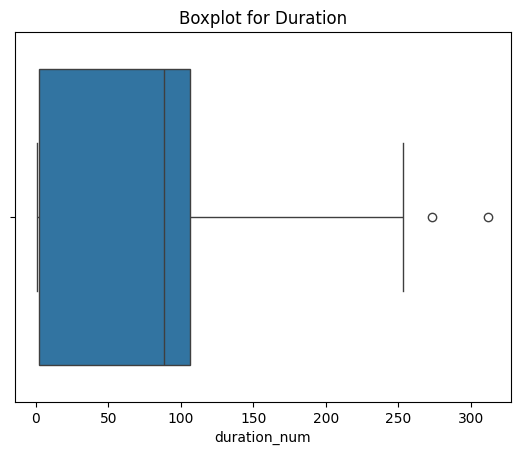

In [117]:

sns.boxplot(x=DF['duration_num'])
plt.title("Boxplot for Duration")
plt.show()


In [116]:
Q1 = DF['duration_num'].quantile(0.25)
Q3 = DF['duration_num'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = DF[(DF['duration_num'] < lower_bound) | (DF['duration_num'] > upper_bound)]
print("Number of outliers:", outliers.shape[0])

# using IQR method for finding outliers

Number of outliers: 2


In [118]:
# Replacing outliers with nearest valid points

DF.loc[DF['duration_num'] > upper_bound, 'duration_num'] = upper_bound
DF.loc[DF['duration_num'] < lower_bound, 'duration_num'] = lower_bound

 #### Checking any inconsistency in data

In [136]:

comma_sep_columns = ['country', 'listed_in','duration_type','type','rating']

for col in comma_sep_columns:
    unique_values = set()
    for entry in DF[col].dropna():
        items = entry.split(',')  # Split by comma
        for item in items:
            unique_values.add(item.strip())  # Remove extra whitespace
    print(f"Unique values in '{col}':\n{unique_values}\n")



Unique values in 'country':
{'', 'Croatia', 'Samoa', 'Montenegro', 'Romania', 'Belgium', 'Iceland', 'Indonesia', 'Sweden', 'Kazakhstan', 'Venezuela', 'Hungary', 'Switzerland', 'New Zealand', 'Senegal', 'Panama', 'Lithuania', 'South Africa', 'Bermuda', 'Serbia', 'Malta', 'Spain', 'Sri Lanka', 'Netherlands', 'Chile', 'Bahamas', 'Mexico', 'Palestine', 'Vietnam', 'Uganda', 'Iraq', 'Somalia', 'Cayman Islands', 'Puerto Rico', 'Japan', 'Taiwan', 'Syria', 'Burkina Faso', 'Canada', 'Cameroon', 'Finland', 'Philippines', 'Hong Kong', 'Paraguay', 'Soviet Union', 'South Korea', 'Greece', 'Malawi', 'Cuba', 'Peru', 'Vatican City', 'Sudan', 'Jordan', 'Albania', 'Morocco', 'Kenya', 'West Germany', 'Liechtenstein', 'Afghanistan', 'France', 'Belarus', 'Ireland', 'Czech Republic', 'Malaysia', 'Ecuador', 'Unknown', 'Georgia', 'Nepal', 'Germany', 'Argentina', 'Zimbabwe', 'Colombia', 'Bulgaria', 'Poland', 'Russia', 'China', 'Singapore', 'Mongolia', 'Nigeria', 'Israel', 'Dominican Republic', 'Norway', 'Algeri

#### No any inconsistent values in categorical attributes

## Data Visualization

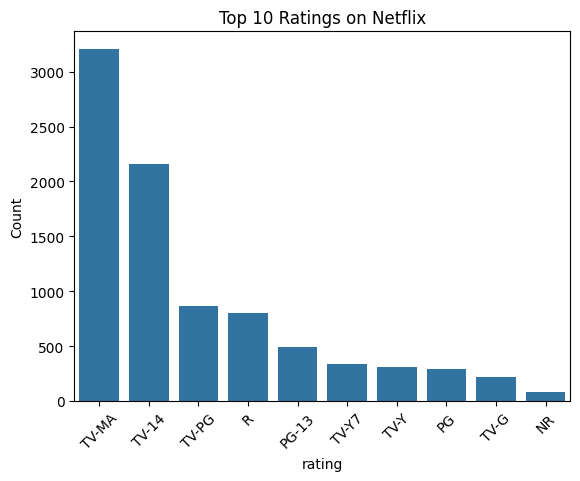

In [140]:
top_ratings = DF['rating'].value_counts().head(10)
sns.barplot(x=top_ratings.index, y=top_ratings.values)
plt.title('Top 10 Ratings on Netflix')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()


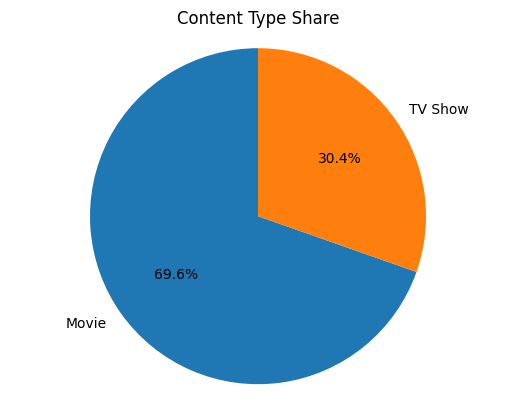

In [141]:
type_counts = DF['type'].value_counts()
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Content Type Share')
plt.axis('equal')
plt.show()


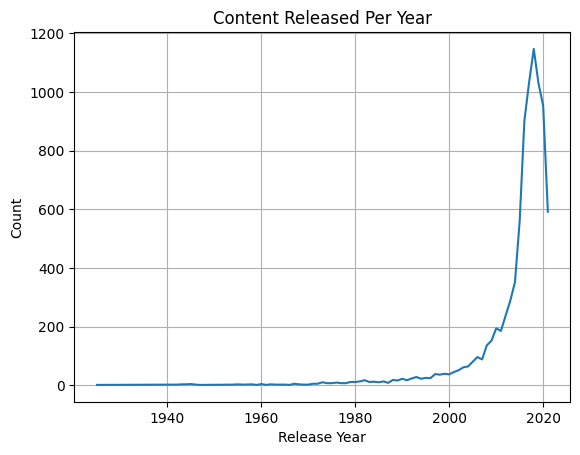

In [142]:
release_by_year = DF['release_year'].value_counts().sort_index()
plt.plot(release_by_year.index, release_by_year.values)
plt.title('Content Released Per Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.grid(True)
plt.show()


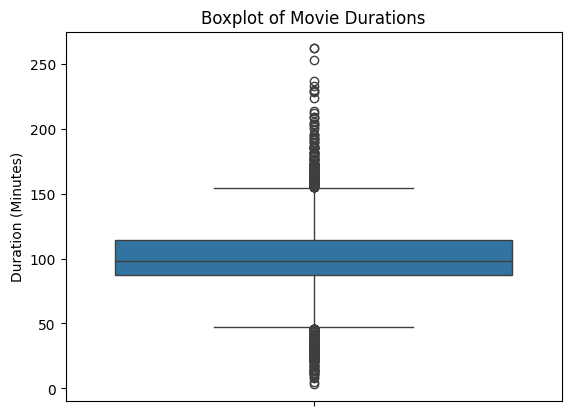

In [143]:
sns.boxplot(data=DF[DF['type'] == 'Movie'], y='duration_num')
plt.title('Boxplot of Movie Durations')
plt.ylabel('Duration (Minutes)')
plt.show()


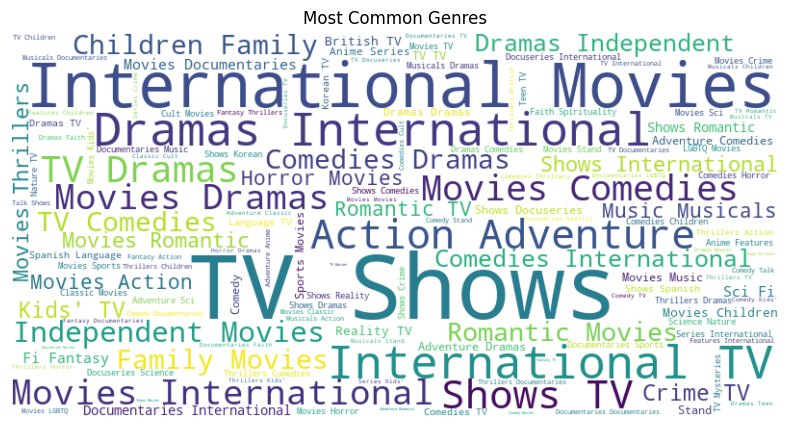

In [145]:
all_genres = ' '.join(DF['listed_in'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_genres)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Genres')
plt.show()


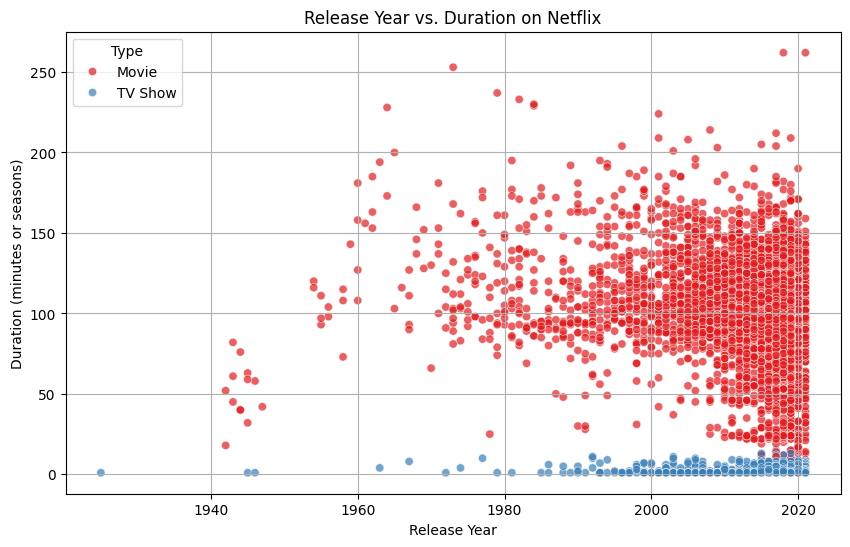

In [147]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=DF, x='release_year', y='duration_num', hue='type', palette='Set1', alpha=0.7)
plt.title('Release Year vs. Duration on Netflix')
plt.xlabel('Release Year')
plt.ylabel('Duration (minutes or seasons)')
plt.legend(title='Type')
plt.grid(True)
plt.show()

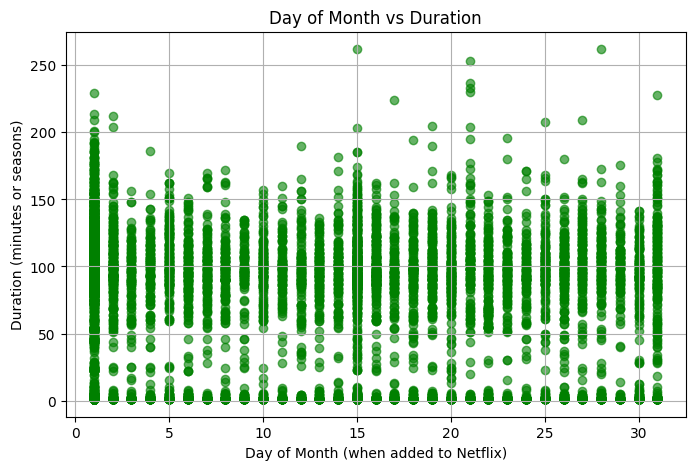

In [171]:
plt.figure(figsize=(8, 5))
plt.scatter(DF['day_added'], DF['duration_num'], color='green', alpha=0.6)
plt.title('Day of Month vs Duration')
plt.xlabel('Day of Month (when added to Netflix)')
plt.ylabel('Duration (minutes or seasons)')
plt.grid(True)
plt.show()

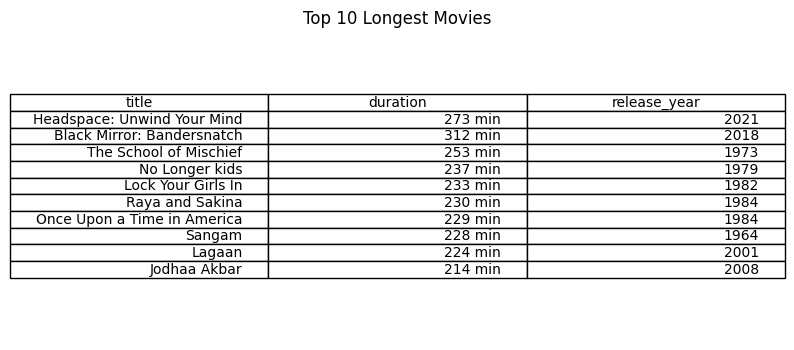

In [150]:

table_data = DF[DF['type'] == 'Movie'].nlargest(10, 'duration_num')[['title', 'duration', 'release_year']]
fig, ax = plt.subplots(figsize=(10, 4))
ax.axis('off')
ax.table(cellText=table_data.values, colLabels=table_data.columns, loc='center')
plt.title("Top 10 Longest Movies", fontsize=12)
plt.show()

# Conclusion

###### 1.Most Netflix content is rated TV-MA, followed by TV-14 and TV-PG.This suggests a significant portion of content is aimed at mature audiences.

###### 2.Movies dominate Netflix's catalog, but TV Shows still make up a substantial share.Netflix offers both short-form (TV) and long-form (movies) entertainment.

###### 3.A steady increase in content releases until recent years, with a slight dip likely due to COVID-19 impacts on production.Most content was released between 2015–2020, indicating Netflix's strong expansion phase.

###### 4.Most movies have durations between 80–120 minutes.There are some outliers with very long durations, possibly documentaries or Bollywood films.

###### 5.Genres like Drama, Comedy, and Documentaries are the most frequent.Reflects viewer demand for story-driven, lighthearted, and informative content.